# Volatility and Risk

In [1]:
import pandas as pd

In [2]:
prices = pd.read_csv('data/sample_prices.csv')
returns = prices.pct_change().dropna()

In [3]:
returns

,BLUE,ORANGE
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249
10,0.006151,-0.168261


Let's compute the standard deviation from first principals:

In [5]:
deviations = returns - returns.mean()
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.mean()
volatality = mean_squared_deviations**0.5

In [6]:
volatality

BLUE      0.022957
ORANGE    0.076212
dtype: float64

In [7]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

Why don't they match? Because, by default, the .std() method computes the sample standard deviation which means that it uses the denominator of  𝑛−1. On the other hand, we computed the population standard deviation, which uses a numerator of  𝑛. Since the observed returns are thought of as observed samples from a distribution, it is probably more accurate to use the denominator of  𝑛−1, so let's redo our calculation to see if we get the same number.

In [9]:
squared_deviations = deviations**2
mean_squared_deviations = squared_deviations.sum()/(returns.shape[0]-1)
volatality = mean_squared_deviations**0.5
volatality

BLUE      0.023977
ORANGE    0.079601
dtype: float64

# Annualizing Volatility

We annualize volatility by scaling (multiplying) it by the square root of the number of periods per observation


In [12]:
import numpy as np
annualized_vol = volatality*np.sqrt(12)
annualized_vol

BLUE      0.083060
ORANGE    0.275747
dtype: float64

# Risk Adjusted Returns

Read in the monthly returns of a set of 10 portfolios formed on market caps

In [16]:
me_m = pd.read_csv('data/Portfolios_Formed_on_ME_monthly_EW.csv',
                  header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


Lo 30, Med 40, Hi 30 are splits based on market cap. The portfolios are formed by equal weight
Lo 20, Qnt2 ... Hi 20 are 5 quintile splits
Lo 10, Dec2 ... Hi 19 are 10 decile splits
Note that the returns are already in percentage form, so we need to convert it to normal form

In [17]:
me_m = me_m/100

In [19]:
me_m.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.0043,0.0152,0.0268,-0.0057,0.0059,0.0160,0.0147,0.0333,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,NaN,0.0390,0.0304,0.0209,0.0384,0.0359,0.0371,0.0161,0.0233,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,NaN,-0.0108,-0.0054,0.0016,-0.0048,-0.0140,0.0000,-0.0050,-0.0009,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,NaN,-0.0332,-0.0352,-0.0306,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,NaN,-0.0046,0.0382,0.0309,-0.0055,0.0218,0.0341,0.0339,0.0316,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


In [20]:
cols = ['Lo 10', 'Med 40', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Med 40,Hi 10
192607,-0.0145,0.0152,0.0329
192608,0.0512,0.0304,0.0370
192609,0.0093,-0.0054,0.0067
192610,-0.0484,-0.0352,-0.0243
192611,-0.0078,0.0382,0.0270


<AxesSubplot:>

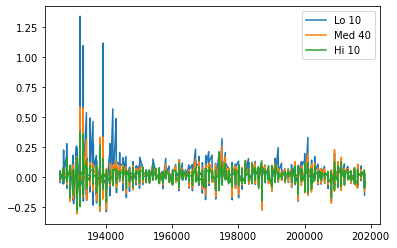

In [22]:
returns.plot()

In [23]:
annualized_vol = returns.std()*12**0.5

In [24]:
annualized_vol

Lo 10     0.368193
Med 40    0.244790
Hi 10     0.186716
dtype: float64

In [27]:
n_months = returns.shape[0]
returns_per_month = (returns+1).prod()**(1/n_months) - 1
returns_per_month

Lo 10     0.012986
Med 40    0.009098
Hi 10     0.007423
dtype: float64

Lo 10 has higher returns and also higher volatility

In [28]:
annualized_returns = (returns_per_month + 1)**12 - 1
annualized_returns

Lo 10     0.167463
Med 40    0.114807
Hi 10     0.092810
dtype: float64

In [29]:
annualized_returns = (1+returns).prod()**(12/n_months) - 1
annualized_returns

Lo 10     0.167463
Med 40    0.114807
Hi 10     0.092810
dtype: float64

Return over risk.... Hi 10 scores better in this

In [31]:
annualized_returns/annualized_vol

Lo 10     0.454825
Med 40    0.469003
Hi 10     0.497063
dtype: float64

## Sharp Ratio

Sharp Ratio = (Returns - Risk Free Rate)/Volatality

In [32]:
riskfree_rate = 0.03
excess_returns = annualized_returns - riskfree_rate
sharpe_ratio = excess_returns / annualized_vol
sharpe_ratio

Lo 10     0.373346
Med 40    0.346449
Hi 10     0.336392
dtype: float64

this indicates that Lo 10 has really given a better risk adjusted result

In [33]:
me_m.columns

Index(['<= 0', 'Lo 30', 'Med 40', 'Hi 30', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4',
       'Hi 20', 'Lo 10', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7',
       'Dec 8', 'Dec 9', 'Hi 10'],
      dtype='object')

Let's look at quintiles

In [34]:
cols = ['Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4', 'Hi 20']
returns = me_m[cols]
returns.head()

,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20
192607,-0.0057,0.0059,0.0160,0.0147,0.0333
192608,0.0384,0.0359,0.0371,0.0161,0.0233
192609,-0.0048,-0.0140,0.0000,-0.0050,-0.0009
192610,-0.0329,-0.0410,-0.0289,-0.0336,-0.0295
192611,-0.0055,0.0218,0.0341,0.0339,0.0316


<AxesSubplot:>

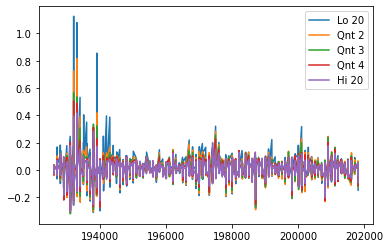

In [35]:
returns.plot()

In [36]:
annualized_vol = returns.std()*12**0.5
annualized_vol

Lo 20    0.336701
Qnt 2    0.274667
Qnt 3    0.244160
Qnt 4    0.221486
Hi 20    0.195116
dtype: float64

In [37]:
annualized_returns = (1+returns).prod()**(12/n_months) - 1
annualized_returns

Lo 20    0.151977
Qnt 2    0.119742
Qnt 3    0.115613
Qnt 4    0.109488
Hi 20    0.098490
dtype: float64

In [38]:
annualized_returns/annualized_vol

Lo 20    0.451370
Qnt 2    0.435953
Qnt 3    0.473514
Qnt 4    0.494332
Hi 20    0.504778
dtype: float64

In [39]:
excess_returns = annualized_returns - riskfree_rate
sharpe_ratio = excess_returns / annualized_vol
sharpe_ratio

Lo 20    0.362271
Qnt 2    0.326730
Qnt 3    0.350643
Qnt 4    0.358883
Hi 20    0.351023
dtype: float64

Let's see the effect on deciles

In [40]:
cols = ['Lo 10', 'Dec 2', 'Dec 3', 'Dec 4', 'Dec 5', 'Dec 6', 'Dec 7', 'Dec 8', 'Dec 9', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,-0.0145,0.0029,-0.0015,0.0133,0.0124,0.0198,0.0155,0.0138,0.0338,0.0329
192608,0.0512,0.0259,0.0403,0.0315,0.0272,0.0472,0.0160,0.0163,0.0098,0.0370
192609,0.0093,-0.0187,-0.0227,-0.0053,0.0007,-0.0007,-0.0164,0.0064,-0.0086,0.0067
192610,-0.0484,-0.0177,-0.0336,-0.0483,-0.0298,-0.0280,-0.0345,-0.0327,-0.0347,-0.0243
192611,-0.0078,-0.0032,-0.0029,0.0465,0.0324,0.0357,0.0382,0.0295,0.0361,0.0270


In [41]:
annualized_vol = returns.std()*12**0.5
annualized_vol

Lo 10    0.368193
Dec 2    0.315841
Dec 3    0.283806
Dec 4    0.267540
Dec 5    0.249848
Dec 6    0.240157
Dec 7    0.228367
Dec 8    0.216948
Dec 9    0.206224
Hi 10    0.186716
dtype: float64

In [42]:
annualized_returns = (1+returns).prod()**(12/n_months) - 1
annualized_returns

Lo 10    0.167463
Dec 2    0.122493
Dec 3    0.121011
Dec 4    0.117643
Dec 5    0.112702
Dec 6    0.117929
Dec 7    0.109493
Dec 8    0.108793
Dec 9    0.103338
Hi 10    0.092810
dtype: float64

In [43]:
annualized_returns/annualized_vol

Lo 10    0.454825
Dec 2    0.387833
Dec 3    0.426386
Dec 4    0.439720
Dec 5    0.451083
Dec 6    0.491047
Dec 7    0.479462
Dec 8    0.501472
Dec 9    0.501094
Hi 10    0.497063
dtype: float64

In [44]:
excess_returns = annualized_returns - riskfree_rate
sharpe_ratio = excess_returns / annualized_vol
sharpe_ratio

Lo 10    0.373346
Dec 2    0.292848
Dec 3    0.320680
Dec 4    0.327587
Dec 5    0.331010
Dec 6    0.366129
Dec 7    0.348094
Dec 8    0.363190
Dec 9    0.355621
Hi 10    0.336392
dtype: float64